# Problem Definition

The birthday paradox asks the question: what is the probability p(n) that any two people share a birthday given a group of people of size n. More specifically, we all ask how many people are required for us to have at least a 50% chance that two people share a birthday, or when is p(n) > 0.5.


# Structure of the article

1. uniform / non uniform distribution
2. mathematical derivation / simulation

In [1]:
# !pip install chaospy
import chaospy

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

User Defined distribution of birthdays

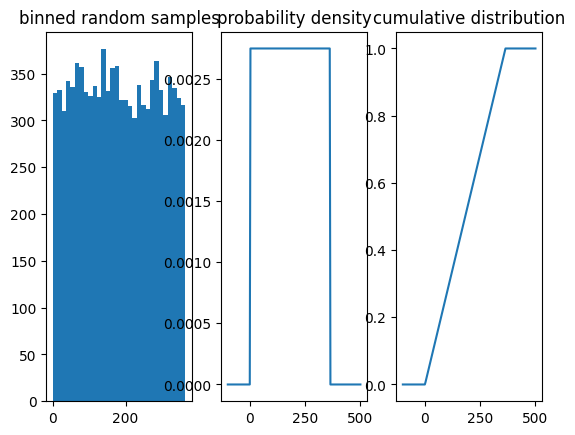

In [2]:
def cdf(x_loc, lo, up):
    """Cumulative distribution function."""
    return (x_loc-lo)/(up-lo)

def lower(lo, up):
    """Lower bounds function."""
    return lo

def upper(lo, up):
    """Upper bounds function."""
    return up


user_distribution = chaospy.UserDistribution(
    cdf=cdf, lower=lower, upper=upper, parameters=dict(lo=0, up=364))


plt.subplot(131)
plt.title("binned random samples")
plt.hist(user_distribution.sample(10000), 30)

plt.subplot(132)
plt.title("probability density")
x_loc = np.linspace(-100, 500, 200)
plt.plot(x_loc, user_distribution.pdf(x_loc))

plt.subplot(133)
plt.title("cumulative distribution")
plt.plot(x_loc, user_distribution.cdf(x_loc))

plt.show()

array([317.49762666, 162.06426855, 147.43707983,  75.96018805,
       297.47035323,  66.24947049, 139.65474323, 287.36900999,
        65.71608575,  16.31281078])

**Simulation**

100%|██████████| 98/98 [00:54<00:00,  1.81it/s]


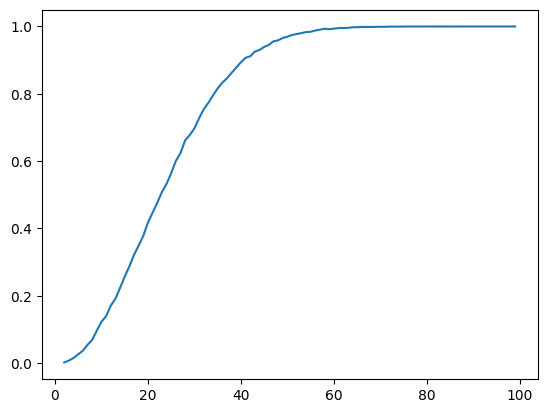

In [3]:

iteration = 10000
duplicate_rate = []
for iGroupSize in tqdm(range(2,100)):
    duplicates_counter = 0
    for i in range(iteration):
        birthdays = np.random.randint(365,size=iGroupSize) # randomize the groups birthdays from 0-364

        uniques, counts = np.unique(birthdays, return_counts=True) # Return the unique birthdays and counts of they appear
        duplicates = uniques[counts > 1] # How many duplicates, or birthdays with counts greater than 1
        duplicates_counter += np.size(duplicates)>0 # Iterate the duplicate counter if there was a duplicate

    duplicate_rate.append(duplicates_counter/iteration) # Compute the probability or fraction of iterations where duplicate occured

# Produce the first simulation plot
plt.plot(range(2,100),duplicate_rate);

In [18]:
np.random.randint(365,size=2)

array([  4, 206])

In [42]:
[range(1,2)]

[range(1, 2)]